In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from cvxpower import *

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from config import *

In [2]:
load1 = FixedLoad(power=50, name="load1")
load2 = FixedLoad(power=100, name="load2")

gen1 = Generator(power_max=1000, alpha=0.02, beta=30, name="gen1")
gen2 = Generator(power_max=100, alpha=0.2, beta=0, name="gen2")

line1 = TransmissionLine(power_max=50, name='line1')
line2 = TransmissionLine(power_max=10, name='line2')
line3 = TransmissionLine(power_max=50, name='line3')

net1 = Net([load1.terminals[0], gen1.terminals[0], 
            line1.terminals[0], line2.terminals[0]], name = 'net1')
net2 = Net([load2.terminals[0], line1.terminals[1], 
            line3.terminals[0]], name = 'net2')
net3 = Net([gen2.terminals[0], line2.terminals[1], 
            line3.terminals[1]], name = 'net3')
network = Group([load1, load2, gen1, gen2,
    line1, line2, line3],
    [net1, net2, net3])

network.init_problem()
network.optimize(solver='ECOS')
print(network.results.summary())

Status: optimal
Terminal                  Power
--------                  -----
gen1[0]                  -90.00
gen2[0]                  -60.00
line1[1]                 -50.00
line1[0]                  50.00
line2[1]                  10.00
line2[0]                 -10.00
line3[1]                  50.00
line3[0]                 -50.00
load1[0]                  50.00
load2[0]                 100.00

Net                       Price
---                       -----
net2                   199.5892
net3                    24.0012
net1                    33.6000

Device                  Payment
------                  -------
line3                  -8779.40
load2                  19958.92
line1                  -8299.46
gen1                   -3024.00
load1                   1680.00
line2                    -95.99
gen2                   -1440.07

Power and price are averages over the time horizon. Payment is total.



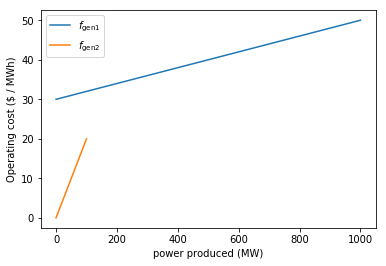

In [3]:
alpha1, beta1, pmax1 = 0.02, 30, 1000
alpha2, beta2, pmax2 = 0.2, 0, 100

#plt.figure(figsize=FIGREGULAR)
xs = np.linspace(0.001,pmax1)
plt.plot(xs, (alpha1*xs**2 + beta1*xs)/xs, label=r'$f_{\rm gen1}$')
xs = np.linspace(0.001,pmax2)
plt.plot(xs, (alpha2*xs**2 + beta2*xs)/xs, label=r'$f_{\rm gen2}$')
plt.legend()
plt.xlabel(r'power produced (MW)')
plt.ylabel(r'Operating cost ($ / MWh)')
#plt.xlim([0, 1000])
#plt.ylim([0, max(pmax1, pmax2)])
plt.savefig("three_bus_gen_cost.pdf")

In [4]:
# load1 = FixedLoad(power=50, name="load1")
# load2 = FixedLoad(power=100, name="load2")

# gen1 = Generator(power_max=1000,
#   alpha=0.01, beta=100, name="gen1")
# gen2 = Generator(power_max=100, alpha=0.1,
#   beta=0.1, name="gen2")

# line1 = TransmissionLine(power_max=50, name = 'line1', alpha=0.001)
# #line1 = TransmissionLine(name = 'line1', alpha=0.001)
# line2 = TransmissionLine(power_max=10, name = 'line2')
# line3 = TransmissionLine(power_max=50, name = 'line3')

# net1 = Net([load1.terminals[0],
#     gen1.terminals[0], line1.terminals[0],
#     line2.terminals[0]], name = 'net1')
# net2 = Net([load2.terminals[0], line1.terminals[1], 
#     line3.terminals[0]], name = 'net2')
# net3 = Net([gen2.terminals[0], line2.terminals[1], 
#     line3.terminals[1]], name = 'net3')
# network = Group([load1, load2, gen1, gen2,
#     line1, line2, line3],
#     [net1, net2, net3])

# network.init_problem()
# network.optimize()
# print(network.results.summary())